<a href="https://colab.research.google.com/github/deepsharma26/SIRT1_ML_NPASS/blob/main/Part3_Final_MACCS_FP_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Feature selection from the genrated MACCS FPs

To select the best features we need the Class or Bioactivity column along with generated MACCS fartures. We have manually added the Bioactivity column or last column. Make sure the newly added column has been renamed as "BioactivityClass".


Additionally, we are converting Active in the BioactivityClass as 'P' and then as '1' and Inactive as 'N' and then as 'o'.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold, SelectKBest, mutual_info_classif
from sklearn.preprocessing import StandardScaler


data = pd.read_csv('SIRT1_05_bioactivity_data_3class_MACC_FP.csv') #bioactivitycolumn has been added manually, MAke
data
print(data.columns)
data.loc[data['BioactivityClass'] == 'Active', 'BioactivityClass'] = 'P'
data.loc[data['BioactivityClass'] == 'Inactive', 'BioactivityClass'] = 'N'
data
data['BioactivityClass'].replace('P', '1', inplace=True)
data['BioactivityClass'].replace('N', '0', inplace=True)
data.rename(columns = {"BioactivityClass": "BioactivityClass"}, inplace = True)
data

Index(['Name', 'MACCSFP1', 'MACCSFP2', 'MACCSFP3', 'MACCSFP4', 'MACCSFP5',
       'MACCSFP6', 'MACCSFP7', 'MACCSFP8', 'MACCSFP9',
       ...
       'MACCSFP158', 'MACCSFP159', 'MACCSFP160', 'MACCSFP161', 'MACCSFP162',
       'MACCSFP163', 'MACCSFP164', 'MACCSFP165', 'MACCSFP166',
       'BioactivityClass'],
      dtype='object', length=168)


/tmp/ipython-input-673426453.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['BioactivityClass'].replace('P', '1', inplace=True)
/tmp/ipython-input-673426453.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

,Name,MACCSFP1,MACCSFP2,MACCSFP3,MACCSFP4,MACCSFP5,MACCSFP6,MACCSFP7,MACCSFP8,MACCSFP9,...,MACCSFP158,MACCSFP159,MACCSFP160,MACCSFP161,MACCSFP162,MACCSFP163,MACCSFP164,MACCSFP165,MACCSFP166,BioactivityClass
0,CHEMBL420311,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,1,1,1,0,1
1,CHEMBL115600,0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,1,1,1,0,1
2,CHEMBL112265,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,1,1,1,0,0
3,CHEMBL446446,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,1,1,1,0,1
4,CHEMBL171137,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,CHEMBL5614132,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0,1
954,CHEMBL4638983,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0,0
955,CHEMBL5620054,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0,0
956,CHEMBL260553,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,1,1,1,0,0


In [ ]:
data.isnull().sum().sum()
data.dropna(inplace =True)
data.isnull().sum().sum()
data1 = data.iloc[:,1:167]
data1
data2 = data.iloc[:,-1]
data2

,BioactivityClass
0,1
1,1
2,0
3,1
4,0
...,...
953,1
954,0
955,0
956,0


Removing low variance faetures

In [ ]:
from sklearn.feature_selection import VarianceThreshold
threshold = VarianceThreshold(threshold=.1)
def variance_threshold_selector(data1, threshold=0.10):
    selector = VarianceThreshold(threshold)
    selector.fit(data1)
    return data1[data1.columns[selector.get_support(indices=True)]]

data1_HV = variance_threshold_selector(data1)

#Clean column names again (precaution)
data1_HV.columns = data1_HV.columns.str.strip()

if 'BioactivityClass' in data1_HV.columns:
    data1_HV = data1_HV.drop(columns=['BioactivityClass'])
data2_HV = pd.merge(data1_HV, data2, left_index=True, right_index=True)
data2_HV.columns = data2_HV.columns.str.strip()
if 'BioactivityClass_x' in data2_HV.columns and 'BioactivityClass_y' in data2_HV.columns:
    data2_HV = data2_HV.drop(columns=['BioactivityClass_x'])
    data2_HV = data2_HV.rename(columns={'BioactivityClass_y': 'BioactivityClass'})

data2_HV

,MACCSFP16,MACCSFP36,MACCSFP38,MACCSFP43,MACCSFP47,MACCSFP50,MACCSFP52,MACCSFP53,MACCSFP54,MACCSFP57,...,MACCSFP150,MACCSFP151,MACCSFP152,MACCSFP153,MACCSFP155,MACCSFP157,MACCSFP158,MACCSFP159,MACCSFP160,BioactivityClass
0,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,1
2,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,0,1,1,0,1,0,0,0,0,0,...,0,1,0,1,1,0,1,1,1,1
954,0,0,0,0,1,0,0,0,1,0,...,0,1,0,1,1,1,1,1,1,0
955,0,0,0,0,0,0,0,0,1,0,...,0,1,0,1,1,1,1,1,1,0
956,0,0,0,0,0,1,0,1,1,1,...,1,0,1,0,1,1,0,1,1,0


Removing highly correlated faetures

In [ ]:
correlated_features_1 = set()
corr_matrix_class = data2_HV.drop(columns=['BioactivityClass']).corr()


for i in range(len(corr_matrix_class.columns)):
    for j in range(i):
        if abs(corr_matrix_class.iloc[i, j]) > 0.9:
            colname = corr_matrix_class.columns[i]
            correlated_features_1.add(colname)
correlated_features_1
def remove_correlated_features(features, data):
    for x in features:
        data.drop(x, axis=1, inplace=True)
    return data
data3 = remove_correlated_features(correlated_features_1, data2_HV)
data3

,MACCSFP16,MACCSFP36,MACCSFP38,MACCSFP43,MACCSFP47,MACCSFP50,MACCSFP52,MACCSFP53,MACCSFP54,MACCSFP57,...,MACCSFP150,MACCSFP151,MACCSFP152,MACCSFP153,MACCSFP155,MACCSFP157,MACCSFP158,MACCSFP159,MACCSFP160,BioactivityClass
0,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,1
2,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,0,1,1,0,1,0,0,0,0,0,...,0,1,0,1,1,0,1,1,1,1
954,0,0,0,0,1,0,0,0,1,0,...,0,1,0,1,1,1,1,1,1,0
955,0,0,0,0,0,0,0,0,1,0,...,0,1,0,1,1,1,1,1,1,0
956,0,0,0,0,0,1,0,1,1,1,...,1,0,1,0,1,1,0,1,1,0


In [ ]:
# Define y (target) as the last column
y = data3.iloc[:, -1]

# Define X (features) as all columns *except* the last one
X = data3.iloc[:, :-1]

In [ ]:
X

,MACCSFP16,MACCSFP36,MACCSFP38,MACCSFP43,MACCSFP47,MACCSFP50,MACCSFP52,MACCSFP53,MACCSFP54,MACCSFP57,...,MACCSFP149,MACCSFP150,MACCSFP151,MACCSFP152,MACCSFP153,MACCSFP155,MACCSFP157,MACCSFP158,MACCSFP159,MACCSFP160
0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,1
2,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,0,1,1,0,1,0,0,0,0,0,...,0,0,1,0,1,1,0,1,1,1
954,0,0,0,0,1,0,0,0,1,0,...,0,0,1,0,1,1,1,1,1,1
955,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,1,1,1,1,1
956,0,0,0,0,0,1,0,1,1,1,...,1,1,0,1,0,1,1,0,1,1


In [ ]:
y

,BioactivityClass
0,1
1,1
2,0
3,1
4,0
...,...
953,1
954,0
955,0
956,0


#Calculating feature scores using mutual_info_classif faeture of SelectKBest.
Then identifying top 20 features important. These features will be used for building ML models


📌 TOP-20 FEATURES (BioactivityClass removed):
      Features    Scores
12  MACCSFP118  0.048720
4    MACCSFP82  0.043562
17  MACCSFP138  0.042768
9   MACCSFP100  0.037778
13  MACCSFP125  0.032218
16  MACCSFP137  0.031691
18  MACCSFP140  0.030351
5    MACCSFP90  0.029377
19  MACCSFP152  0.028654
8    MACCSFP97  0.027873
2    MACCSFP73  0.025541
10  MACCSFP108  0.023154
1    MACCSFP54  0.021362
0    MACCSFP52  0.020905
11  MACCSFP113  0.020354
7    MACCSFP92  0.019806
3    MACCSFP79  0.019658
15  MACCSFP129  0.019516
6    MACCSFP91  0.018491
14  MACCSFP128  0.018172


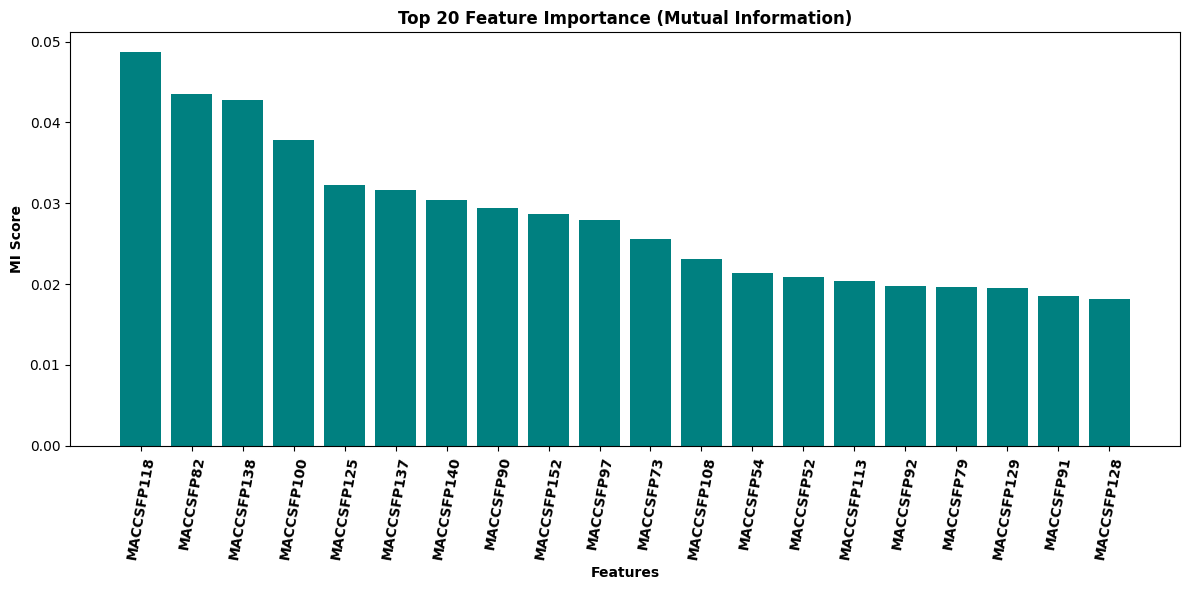


🎉 Saved:
> Top20_Feature_Importance.csv
> Top20_FeatureImportance_Plot.jpg
> Final_Trainset_Top20.csv  (20 selected features + BioactivityClass)


In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------------------------------
# 1) Prepare features (X) and target (y) — EXCLUDING BioactivityClass
# -------------------------------------------------------
y = data3['BioactivityClass']    # Target column
X = data3.drop(columns=['BioactivityClass'])   # Remove from feature set (✔ fixed)

# Optional scaling for better MI score measurement
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------------------------------------------
# 2) Select TOP 20 features (random_state = fixed → no change between runs)
# -------------------------------------------------------
k = 20

def mi_score(X_local, y_local):
    return mutual_info_classif(X_local, y_local, random_state=42)  # Reproducible output

kBest = SelectKBest(score_func=mi_score, k=k)
X_new = kBest.fit_transform(X_scaled, y)

selected_mask = kBest.get_support()
selected_columns = X.columns[selected_mask]
selected_scores = kBest.scores_[selected_mask]

# Score table
featureScores = pd.DataFrame({
    'Features': selected_columns,
    'Scores': selected_scores
}).sort_values('Scores', ascending=False)

print("\n📌 TOP-20 FEATURES (BioactivityClass removed):")
print(featureScores.head(20))

featureScores.to_csv('Top20_Feature_Importance.csv', index=False)

# -------------------------------------------------------
# 3) Plot Top-20 Feature Importance (BioactivityClass NOT included)
# -------------------------------------------------------
plt.figure(figsize=(12,6))
plt.bar(featureScores['Features'], featureScores['Scores'], color='teal')
plt.title("Top 20 Feature Importance (Mutual Information)", fontweight="bold")
plt.xlabel("Features", fontweight="bold")
plt.ylabel("MI Score", fontweight="bold")
plt.xticks(rotation=80, fontweight="bold")
plt.tight_layout()
plt.savefig("Top20_FeatureImportance_Plot.jpg", dpi=300, bbox_inches='tight')
plt.show()

# -------------------------------------------------------
# 4) Output dataset containing only top-20 features + target column
# -------------------------------------------------------
X_top20_dataset = pd.concat([data3[selected_columns], y], axis=1)
X_top20_dataset.to_csv("Final_Trainset_Top20.csv", index=False)

print("\n🎉 Saved:")
print("> Top20_Feature_Importance.csv")
print("> Top20_FeatureImportance_Plot.jpg")
print("> Final_Trainset_Top20.csv  (20 selected features + BioactivityClass)")


Downloading data in zip file

In [ ]:
! zip SIRT1_MACCS_FP_selection.zip *.csv *.jpg

  adding: Final_Trainset_Top20.csv (deflated 94%)
  adding: SIRT1_05_bioactivity_data_3class_MACC_FP.csv (deflated 94%)
  adding: Top20_Feature_Importance.csv (deflated 55%)
  adding: Top20_FeatureImportance_Plot.jpg (deflated 57%)
